In [3]:
def nagivator(start, destination, connection_graph):
    pathes = [[start] ]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
                
        pathes = sorted(pathes, key=len) # 最小换成
                
        seen.add(froniter)


In [4]:

def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes
                
        seen.add(froniter)

In [5]:

connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

H:\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


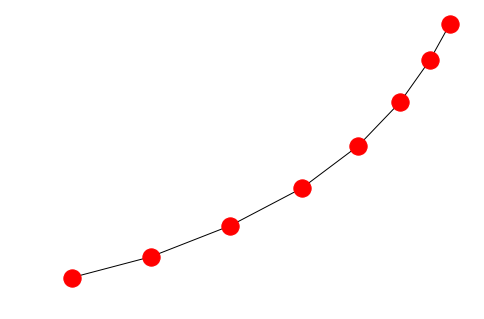

In [6]:
import networkx as nx
%matplotlib inline
nx.draw(nx.Graph(connection_2))

In [7]:

nagivator_bfs(0, 7, connection_2)

NameError: name 'nagivator_bfs' is not defined

In [ ]:
nagivator_dfs(0, 7, connection_2)

In [9]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [10]:
import random

In [11]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [12]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [14]:
gene(parse_grammar(grammar))

'这个桌子坐在一个女人'